In [1]:
import numpy as np
import time
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import itertools

In [2]:
carpetaL='./data/'
archivosL=np.array(['business.npy','entertainment.npy','politics.npy','sport.npy','tech.npy'])

In [3]:
# Separa en conjuntos de entrenamiento, validación y test
def separar(carpeta,archivos):
    x_train_lista=[]
    x_val_lista=[]
    x_test_lista=[]
    y_train_lista=[]
    y_val_lista=[]
    y_test_lista=[]
    nClases=len(archivos)
    
    for i in np.arange(nClases):
        X=np.load(carpeta+archivos[i])
        largo=len(X)
        Y=np.ones(largo)*i
        x_train,x_otros,y_train,y_otros=train_test_split(X,Y,test_size=0.5,random_state=42)
        x_val,x_test,y_val,y_test=train_test_split(x_otros,y_otros,test_size=0.5,random_state=42)
        x_train_lista.append(x_train)
        x_val_lista.append(x_val)
        x_test_lista.append(x_test)
        y_train_lista.append(y_train)
        y_val_lista.append(y_val)
        y_test_lista.append(y_test)
    
    Xtrain=np.concatenate(x_train_lista)
    Xval=np.concatenate(x_val_lista)
    Xtest=np.concatenate(x_test_lista)
    Ytrain=np.concatenate(y_train_lista)
    Yval=np.concatenate(y_val_lista)
    Ytest=np.concatenate(y_test_lista)
    return Xtrain,Xval,Xtest,Ytrain,Yval,Ytest

In [4]:
Xtrain,Xval,Xtest,Ytrain,Yval,Ytest=separar(carpetaL,archivosL)

In [5]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Knn

In [6]:
neigh=KNeighborsClassifier(n_neighbors=5)
neigh.fit(Xtrain,Ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

Normalized confusion matrix
[[0.92125984 0.         0.03937008 0.         0.03937008]
 [0.01041667 0.90625    0.04166667 0.01041667 0.03125   ]
 [0.01923077 0.00961538 0.96153846 0.         0.00961538]
 [0.00787402 0.         0.         0.99212598 0.        ]
 [0.02       0.01       0.         0.         0.97      ]]


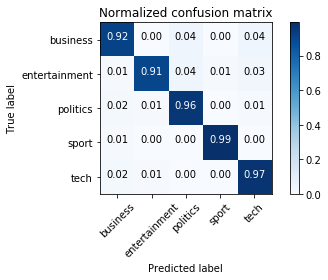

accuracy_score
0.9512635379061372
precision_score
0.9506798237235847
recall_score
0.950234857662023
f1_score
0.9498762467516555


In [7]:
YPval=neigh.predict(Xval)
cnf_matrix=confusion_matrix(Yval,YPval)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['business','entertainment','politics','sport','tech'], normalize=True,title='Normalized confusion matrix')
plt.show()
print('accuracy_score')
print(accuracy_score(Yval,YPval))

print('precision_score')
print(precision_score(Yval,YPval,average='macro'))

print('recall_score')
print(recall_score(Yval,YPval,average='macro'))

print('f1_score')
print(f1_score(Yval,YPval,average='macro'))

Normalized confusion matrix
[[0.90625    0.         0.046875   0.         0.046875  ]
 [0.         0.89690722 0.08247423 0.         0.02061856]
 [0.02857143 0.         0.96190476 0.         0.00952381]
 [0.         0.         0.         1.         0.        ]
 [0.00990099 0.02970297 0.00990099 0.00990099 0.94059406]]


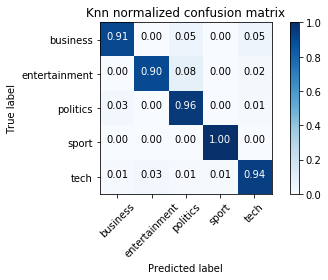

accuracy_score
0.9427549194991055
precision_score
0.9419465177965579
recall_score
0.9411312075611097
f1_score
0.940586104284099


In [8]:
YPtest=neigh.predict(Xtest)
cnf_matrix=confusion_matrix(Ytest,YPtest)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['business','entertainment','politics','sport','tech'], normalize=True,title='Knn normalized confusion matrix')
#plt.savefig('knn.png')
plt.show()

print('accuracy_score')
print(accuracy_score(Ytest,YPtest))

print('precision_score')
print(precision_score(Ytest,YPtest,average='macro'))

print('recall_score')
print(recall_score(Ytest,YPtest,average='macro'))

print('f1_score')
print(f1_score(Ytest,YPtest,average='macro'))


# SVM


In [9]:
clf = svm.SVC(C=500,gamma=1/200,kernel='rbf')
clf.fit(Xtrain,Ytrain)

SVC(C=500, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Normalized confusion matrix
[[0.94488189 0.00787402 0.01574803 0.         0.03149606]
 [0.01041667 0.9375     0.02083333 0.         0.03125   ]
 [0.02884615 0.         0.95192308 0.         0.01923077]
 [0.         0.         0.         1.         0.        ]
 [0.03       0.01       0.         0.         0.96      ]]


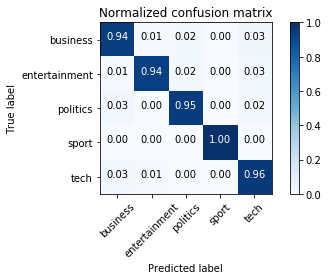

accuracy_score
0.9602888086642599
precision_score
0.9597187044316801
recall_score
0.9588609933373713
f1_score
0.9590871606517023


In [10]:
YPval=clf.predict(Xval)
cnf_matrix=confusion_matrix(Yval,YPval)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['business','entertainment','politics','sport','tech'], normalize=True,title='Normalized confusion matrix')
plt.show()
print('accuracy_score')
print(accuracy_score(Yval,YPval))

print('precision_score')
print(precision_score(Yval,YPval,average='macro'))

print('recall_score')
print(recall_score(Yval,YPval,average='macro'))

print('f1_score')
print(f1_score(Yval,YPval,average='macro'))

Normalized confusion matrix
[[0.9609375  0.         0.0234375  0.         0.015625  ]
 [0.         0.96907216 0.02061856 0.         0.01030928]
 [0.02857143 0.         0.96190476 0.         0.00952381]
 [0.         0.         0.         1.         0.        ]
 [0.02970297 0.04950495 0.00990099 0.00990099 0.9009901 ]]


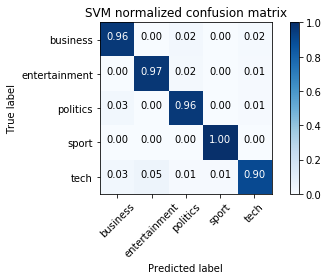

accuracy_score
0.960644007155635
precision_score
0.9594102708180884
recall_score
0.9585809051726233
f1_score
0.9587785367432342


In [11]:
YPtest=clf.predict(Xtest)
cnf_matrix=confusion_matrix(Ytest,YPtest)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['business','entertainment','politics','sport','tech'], normalize=True,title='SVM normalized confusion matrix')
#plt.savefig('svm.png')
plt.show()

print('accuracy_score')
print(accuracy_score(Ytest,YPtest))

print('precision_score')
print(precision_score(Ytest,YPtest,average='macro'))

print('recall_score')
print(recall_score(Ytest,YPtest,average='macro'))

print('f1_score')
print(f1_score(Ytest,YPtest,average='macro'))